In [62]:
#We'll use the Pillow library for image handling and create 2 simple functions:

#encode_message() – To hide text in image

#decode_message() – To retrieve hidden text from image



In [63]:
# importing library

In [64]:
pip install pillow numpy

Note: you may need to restart the kernel to use updated packages.


In [65]:
import string
import os
import cv2 
import matplotlib.pyplot as plt

In [66]:
d={chr(i):i for i in range(255)} 
c={i:chr(i) for i in range(255)}

In [67]:
# image load

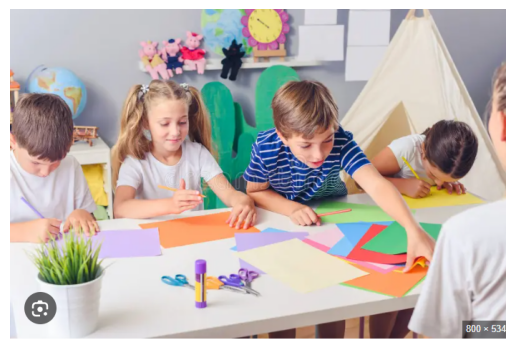

In [68]:
image_path= r"C:\Users\Bushra\Pictures\Screenshots\image for hide text.png"
x= cv2.imread(image_path)
xrgb=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(xrgb)
plt.axis('off')
plt.show()


In [69]:
key="123"
text="Bushra Steganography Internship Project"



In [70]:
key

'123'

In [71]:
text

'Bushra Steganography Internship Project'

In [72]:
text_asii=[d[ch] for ch in text]
key_ascii=[d[ch] for ch in key]
print(text_asii)
print(key_ascii)

[66, 117, 115, 104, 114, 97, 32, 83, 116, 101, 103, 97, 110, 111, 103, 114, 97, 112, 104, 121, 32, 73, 110, 116, 101, 114, 110, 115, 104, 105, 112, 32, 80, 114, 111, 106, 101, 99, 116]
[49, 50, 51]


In [73]:
x_enc=x.copy()
n=0
m=0 
z=0  
l=len(text)
kl=0
for i in range(l):
    orig_val=x_enc[n,m,z]
    new_val=d[text[i]]^d[key[kl]] # smalL "l" (kl)
    x_enc[n,m,z]=new_val
    print(f"Emneddingn'{text[i]}' (ASCII {d[text[i]]}) XOR '{key[kl]}' (ASCII{d[key[kl]]})={new_val} at pixel ({n},{m},{z} [original= {orig_val}]")
    n=n+1
    m=m+1
    m=(m+1)%3
    z=(z+1)%3
    kl=(kl+1)%len(key)

Emneddingn'B' (ASCII 66) XOR '1' (ASCII49)=115 at pixel (0,0,0 [original= 222]
Emneddingn'u' (ASCII 117) XOR '2' (ASCII50)=71 at pixel (1,2,1 [original= 214]
Emneddingn's' (ASCII 115) XOR '3' (ASCII51)=64 at pixel (2,1,2 [original= 211]
Emneddingn'h' (ASCII 104) XOR '1' (ASCII49)=89 at pixel (3,0,0 [original= 222]
Emneddingn'r' (ASCII 114) XOR '2' (ASCII50)=64 at pixel (4,2,1 [original= 214]
Emneddingn'a' (ASCII 97) XOR '3' (ASCII51)=82 at pixel (5,1,2 [original= 211]
Emneddingn' ' (ASCII 32) XOR '1' (ASCII49)=17 at pixel (6,0,0 [original= 222]
Emneddingn'S' (ASCII 83) XOR '2' (ASCII50)=97 at pixel (7,2,1 [original= 214]
Emneddingn't' (ASCII 116) XOR '3' (ASCII51)=71 at pixel (8,1,2 [original= 210]
Emneddingn'e' (ASCII 101) XOR '1' (ASCII49)=84 at pixel (9,0,0 [original= 221]
Emneddingn'g' (ASCII 103) XOR '2' (ASCII50)=85 at pixel (10,2,1 [original= 213]
Emneddingn'a' (ASCII 97) XOR '3' (ASCII51)=82 at pixel (11,1,2 [original= 210]
Emneddingn'n' (ASCII 110) XOR '1' (ASCII49)=95 at pixe

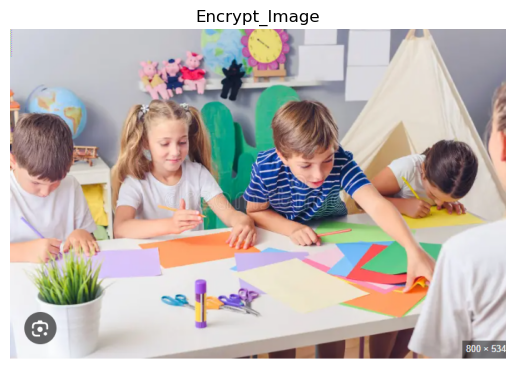

In [74]:
plt.imshow(cv2.cvtColor(x_enc,cv2.COLOR_BGR2RGB))
plt.title("Encrypt_Image")
plt.axis('off')
plt.show()

In [75]:
cv2.imwrite("encrypt.jpg",x_enc)

True

In [76]:
x.shape

(462, 693, 3)

In [77]:
#Convert Message to Binary

In [78]:
def text_to_binary(msg):
    return ''.join([format(ord(c), '08b') for c in msg])


In [79]:
# Import and Define Functions 

In [80]:
from PIL import Image

# Convert text to binary
def text_to_binary(text):
    return ''.join(format(ord(i), '08b') for i in text)

# Convert binary to text
def binary_to_text(binary_data):
    all_bytes = [binary_data[i:i+8] for i in range(0, len(binary_data), 8)]
    return ''.join([chr(int(byte, 2)) for byte in all_bytes])

# Encode message into image
def encode_message(image_path, message, output_path):
    image = Image.open(image_path)
    encoded = image.copy()
    width, height = image.size
    binary_message = text_to_binary(message) + '1111111111111110'

    data_index = 0
    for y in range(height):
        for x in range(width):
            if data_index >= len(binary_message):
                break
            pixel = list(image.getpixel((x, y)))
            for i in range(3):  # R, G, B
                if data_index < len(binary_message):
                    pixel[i] = pixel[i] & ~1 | int(binary_message[data_index])
                    data_index += 1
            encoded.putpixel((x, y), tuple(pixel))
        if data_index >= len(binary_message):
            break

    encoded.save(output_path)
    
    # Corrected print statement
    print(f"This is Bushra's steganography internship project! Message encoded and saved to: {output_path}")

# Decode message from image
def decode_message(image): 
    binary_data = ''
    for y in range(image.height):
        for x in range(image.width):
            pixel = image.getpixel((x, y))
            for i in range(3):
                binary_data += str(pixel[i] & 1)

    end_marker = '1111111111111110'
    end_index = binary_data.find(end_marker)
    if end_index != -1:
        message_binary = binary_data[:end_index]
        return binary_to_text(message_binary)
    else:
        return "❌ No hidden message found."


In [81]:
# Step 2A: Define your secret message
message = "This is Bushra's steganography internship project!"


# Step 2B: Call encode function with paths
encode_message(
    image_path=r"C:\Users\Bushra\Pictures\Screenshots\encoded img.png",  # input image
    message=message,
    output_path=r"C:\Users\Bushra\Pictures\Screenshots\output.png"  # output image
)


This is Bushra's steganography internship project! Message encoded and saved to: C:\Users\Bushra\Pictures\Screenshots\output.png


In [82]:
#Decode the message from the new image

In [85]:
# Step 3: Read hidden message from encoded image
decoded = decode_message(Image.open(r"C:\Users\Bushra\Pictures\Screenshots\output.png"))
print("Secret successfully decoded! Here is the hidden message:", decoded)




Secret successfully decoded! Here is the hidden message: This is Bushra's steganography internship project!


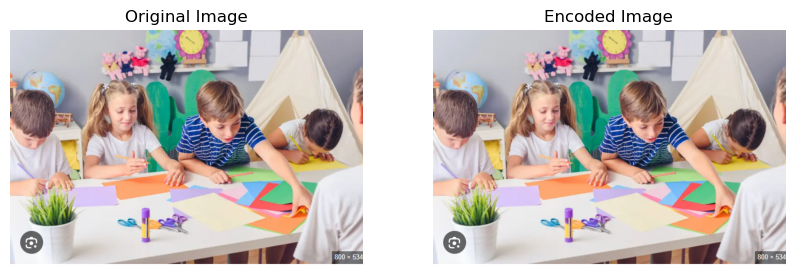

In [84]:
import matplotlib.pyplot as plt
import cv2

# Load images
original = cv2.cvtColor(cv2.imread(r"C:\Users\Bushra\Pictures\Screenshots\image for hide text.png"), cv2.COLOR_BGR2RGB)
encoded = cv2.cvtColor(cv2.imread(r"C:\Users\Bushra\Pictures\Screenshots\output.png"), cv2.COLOR_BGR2RGB)

# Display
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(original)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(encoded)
plt.title("Encoded Image")
plt.axis('off')

plt.show()
